In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
path = "D:\Data science\Datasets\house-prices-advanced-regression-techniques\\train.csv"

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

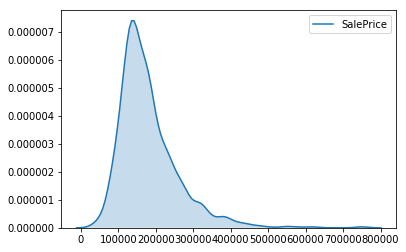

In [11]:
sns.kdeplot(df["SalePrice"] , shade = True)

In [14]:
df["SalePrice"].value_counts().head(10)

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
Name: SalePrice, dtype: int64

In [15]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3- Q1

In [21]:
print(Q1)
print(Q3)

129975.0
214000.0


In [22]:
#we can conclude that 50% data convers from 129975 to 214000.

C:\Users\Nihal Verma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


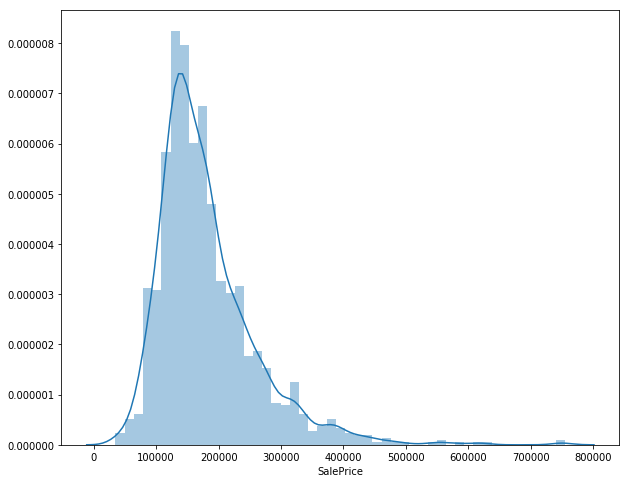

In [25]:
plt.figure(figsize = (10 , 8))
sns.distplot(df["SalePrice"] , kde = True)

In [26]:
#looks like our data have positive skewness let's find

In [27]:
print(df["SalePrice"].skew())

1.8828757597682129


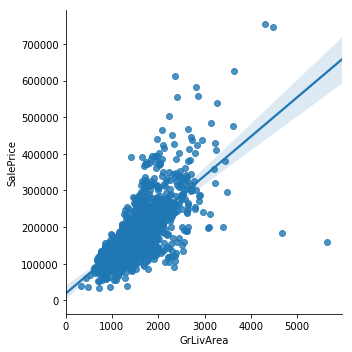

In [35]:
sns.lmplot(x = "GrLivArea" , y = "SalePrice" , data = df   )

In [36]:
# GrLivArea and SalePrice have positive correlation
#ther are two houses that have High Living area but they have low sale price
# let's find some information about them

In [38]:
df["GrLivArea"].max()

5642

In [41]:
df.iloc[df["GrLivArea"].idxmax()]

Id                  1299
MSSubClass            60
MSZoning              RL
LotFrontage          313
LotArea            63887
Street              Pave
Alley                NaN
LotShape             IR3
LandContour          Bnk
Utilities         AllPub
LotConfig         Corner
LandSlope            Gtl
Neighborhood     Edwards
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual           10
OverallCond            5
YearBuilt           2008
YearRemodAdd        2008
RoofStyle            Hip
RoofMatl         ClyTile
Exterior1st       Stucco
Exterior2nd       Stucco
MasVnrType         Stone
MasVnrArea           796
ExterQual             Ex
ExterCond             TA
Foundation         PConc
                  ...   
BedroomAbvGr           3
KitchenAbvGr           1
KitchenQual           Ex
TotRmsAbvGrd          12
Functional           Typ
Fireplaces             3
FireplaceQu           Gd
GarageType        Attchd
GarageYrBlt         2008


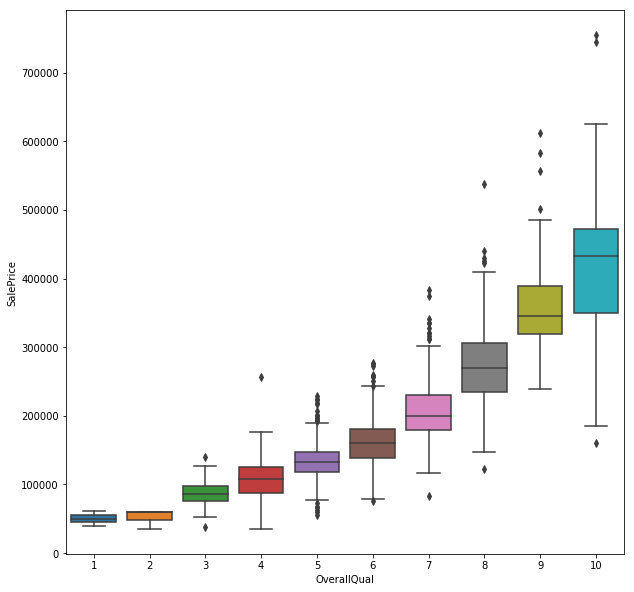

In [43]:
plt.figure(figsize = (10 , 10))
sns.boxplot( x = df["OverallQual"] , y = df["SalePrice"])

[Text(0,0,'1872'),
 Text(0,0,'1875'),
 Text(0,0,'1880'),
 Text(0,0,'1882'),
 Text(0,0,'1885'),
 Text(0,0,'1890'),
 Text(0,0,'1892'),
 Text(0,0,'1893'),
 Text(0,0,'1898'),
 Text(0,0,'1900'),
 Text(0,0,'1904'),
 Text(0,0,'1905'),
 Text(0,0,'1906'),
 Text(0,0,'1908'),
 Text(0,0,'1910'),
 Text(0,0,'1911'),
 Text(0,0,'1912'),
 Text(0,0,'1913'),
 Text(0,0,'1914'),
 Text(0,0,'1915'),
 Text(0,0,'1916'),
 Text(0,0,'1917'),
 Text(0,0,'1918'),
 Text(0,0,'1919'),
 Text(0,0,'1920'),
 Text(0,0,'1921'),
 Text(0,0,'1922'),
 Text(0,0,'1923'),
 Text(0,0,'1924'),
 Text(0,0,'1925'),
 Text(0,0,'1926'),
 Text(0,0,'1927'),
 Text(0,0,'1928'),
 Text(0,0,'1929'),
 Text(0,0,'1930'),
 Text(0,0,'1931'),
 Text(0,0,'1932'),
 Text(0,0,'1934'),
 Text(0,0,'1935'),
 Text(0,0,'1936'),
 Text(0,0,'1937'),
 Text(0,0,'1938'),
 Text(0,0,'1939'),
 Text(0,0,'1940'),
 Text(0,0,'1941'),
 Text(0,0,'1942'),
 Text(0,0,'1945'),
 Text(0,0,'1946'),
 Text(0,0,'1947'),
 Text(0,0,'1948'),
 Text(0,0,'1949'),
 Text(0,0,'1950'),
 Text(0,0,'1

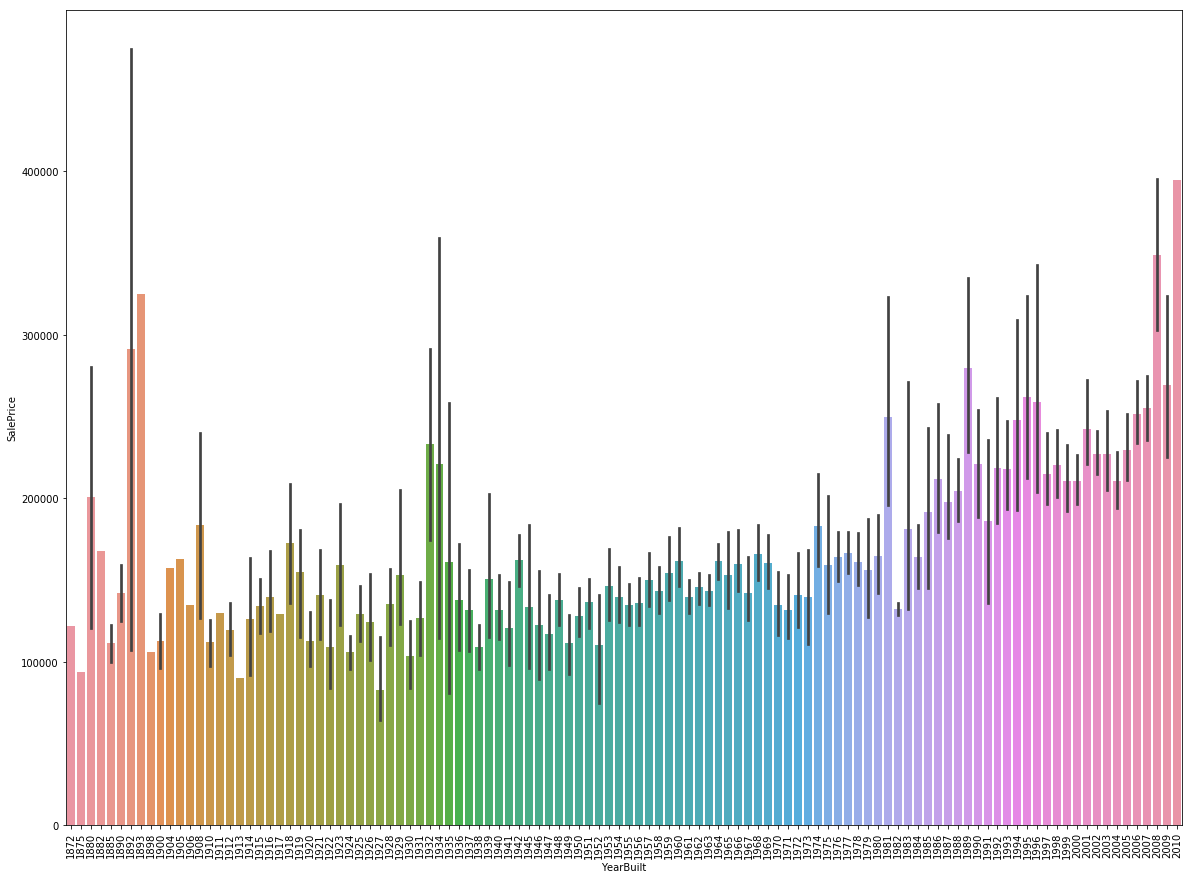

In [51]:
plt.figure(figsize=(20 , 15))
g = sns.barplot(x = df["YearBuilt"] , y = df["SalePrice"])
g.set_xticklabels(g.get_xticklabels() , rotation = 90)

In [52]:
# seems like that saleprice is not very much rely on Year built

In [59]:
# there are 81 features to analyze each of them one by one going
# to take lot time so we are going to use HeatMap for find the 
# correlation among features and only analyzes top features

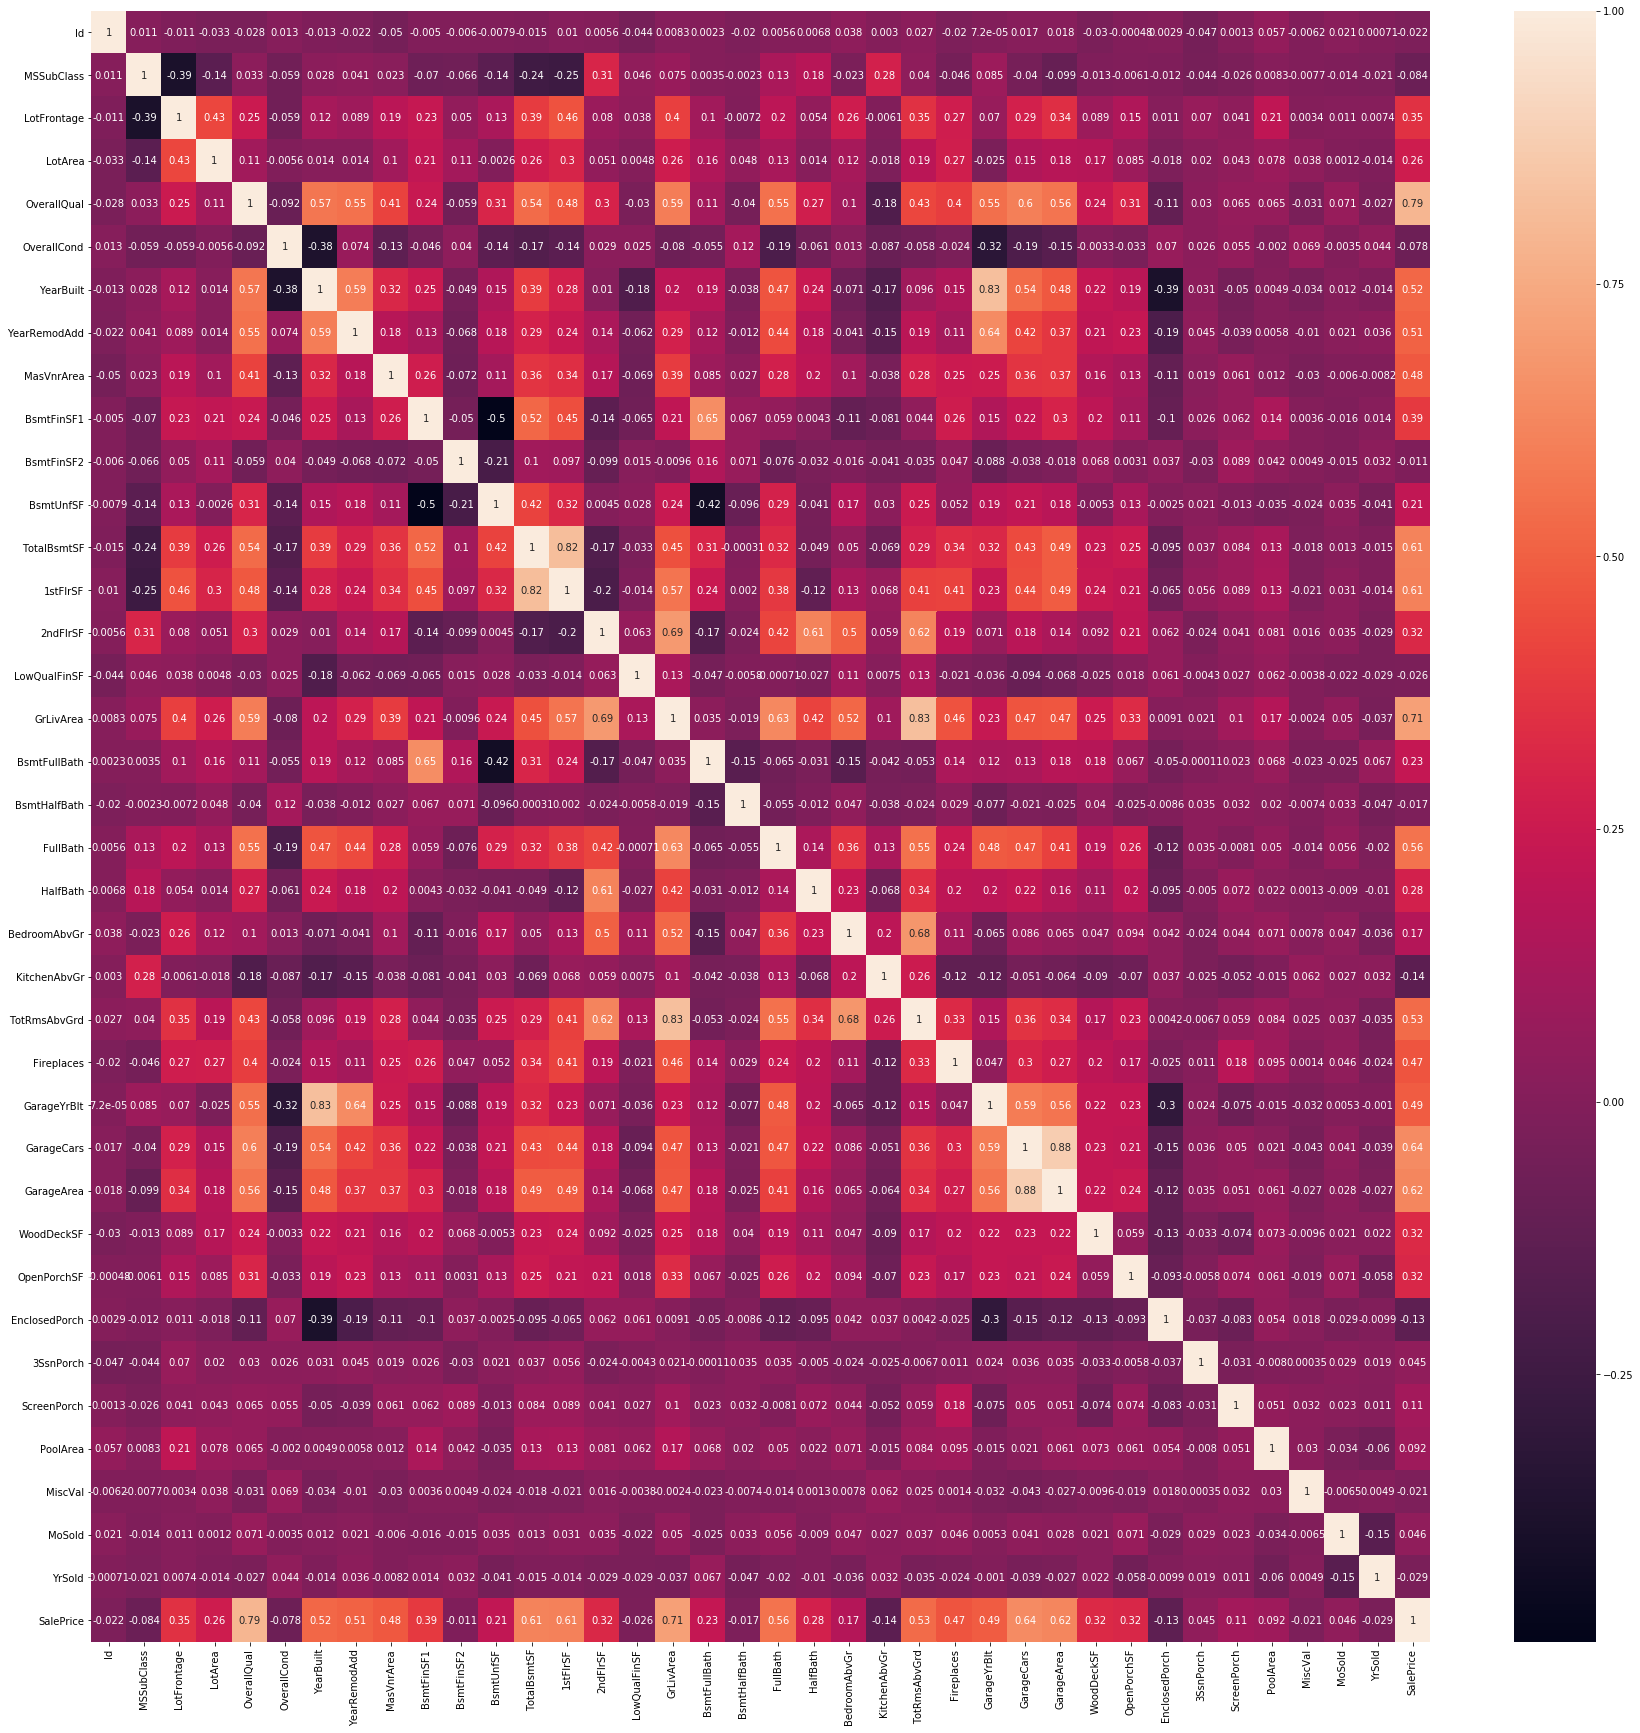

In [55]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr() , annot = True)

In [58]:
# as we can see that Sale price is depends on following features
'''
    OverallQual
    yearbuilt
    YearremodAdd
    masvnrArea
    TotalBsmtSF
    1stflrSF
    GrLivArea
    FullBath
    TotRmsAbvGrd
    GarageYrBlt
    FirePlaces
    GarageCars
    GarageArea
    
'''

'\n    OverallQual\n    yearbuilt\n    YearremodAdd\n    masvnrArea\n    TotalBsmtSF\n    1stflrSF\n    GrLivArea\n    FullBath\n    TotRmsAbvGrd\n    GarageYrBlt\n    FirePlaces\n    GarageCars\n    GarageArea\n    \n'

In [60]:
corr = df.corr()

In [62]:
corr.nlargest(10 , 'SalePrice' )

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [67]:
corr.nlargest(10, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [68]:
corr.nlargest(10 , 'SalePrice').index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [69]:
cr = corr.nlargest(10 , 'SalePrice').index

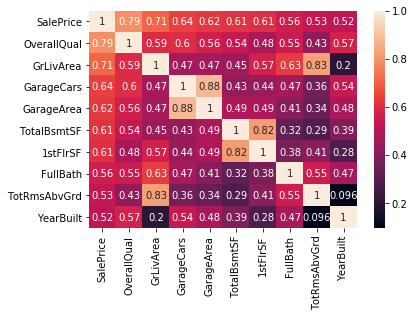

In [72]:
sns.heatmap(df[cr].corr() , annot = True)

In [73]:
# so to analyze features with plot it takes lot of time 
#so lets check all plots together

<Figure size 1080x1080 with 0 Axes>

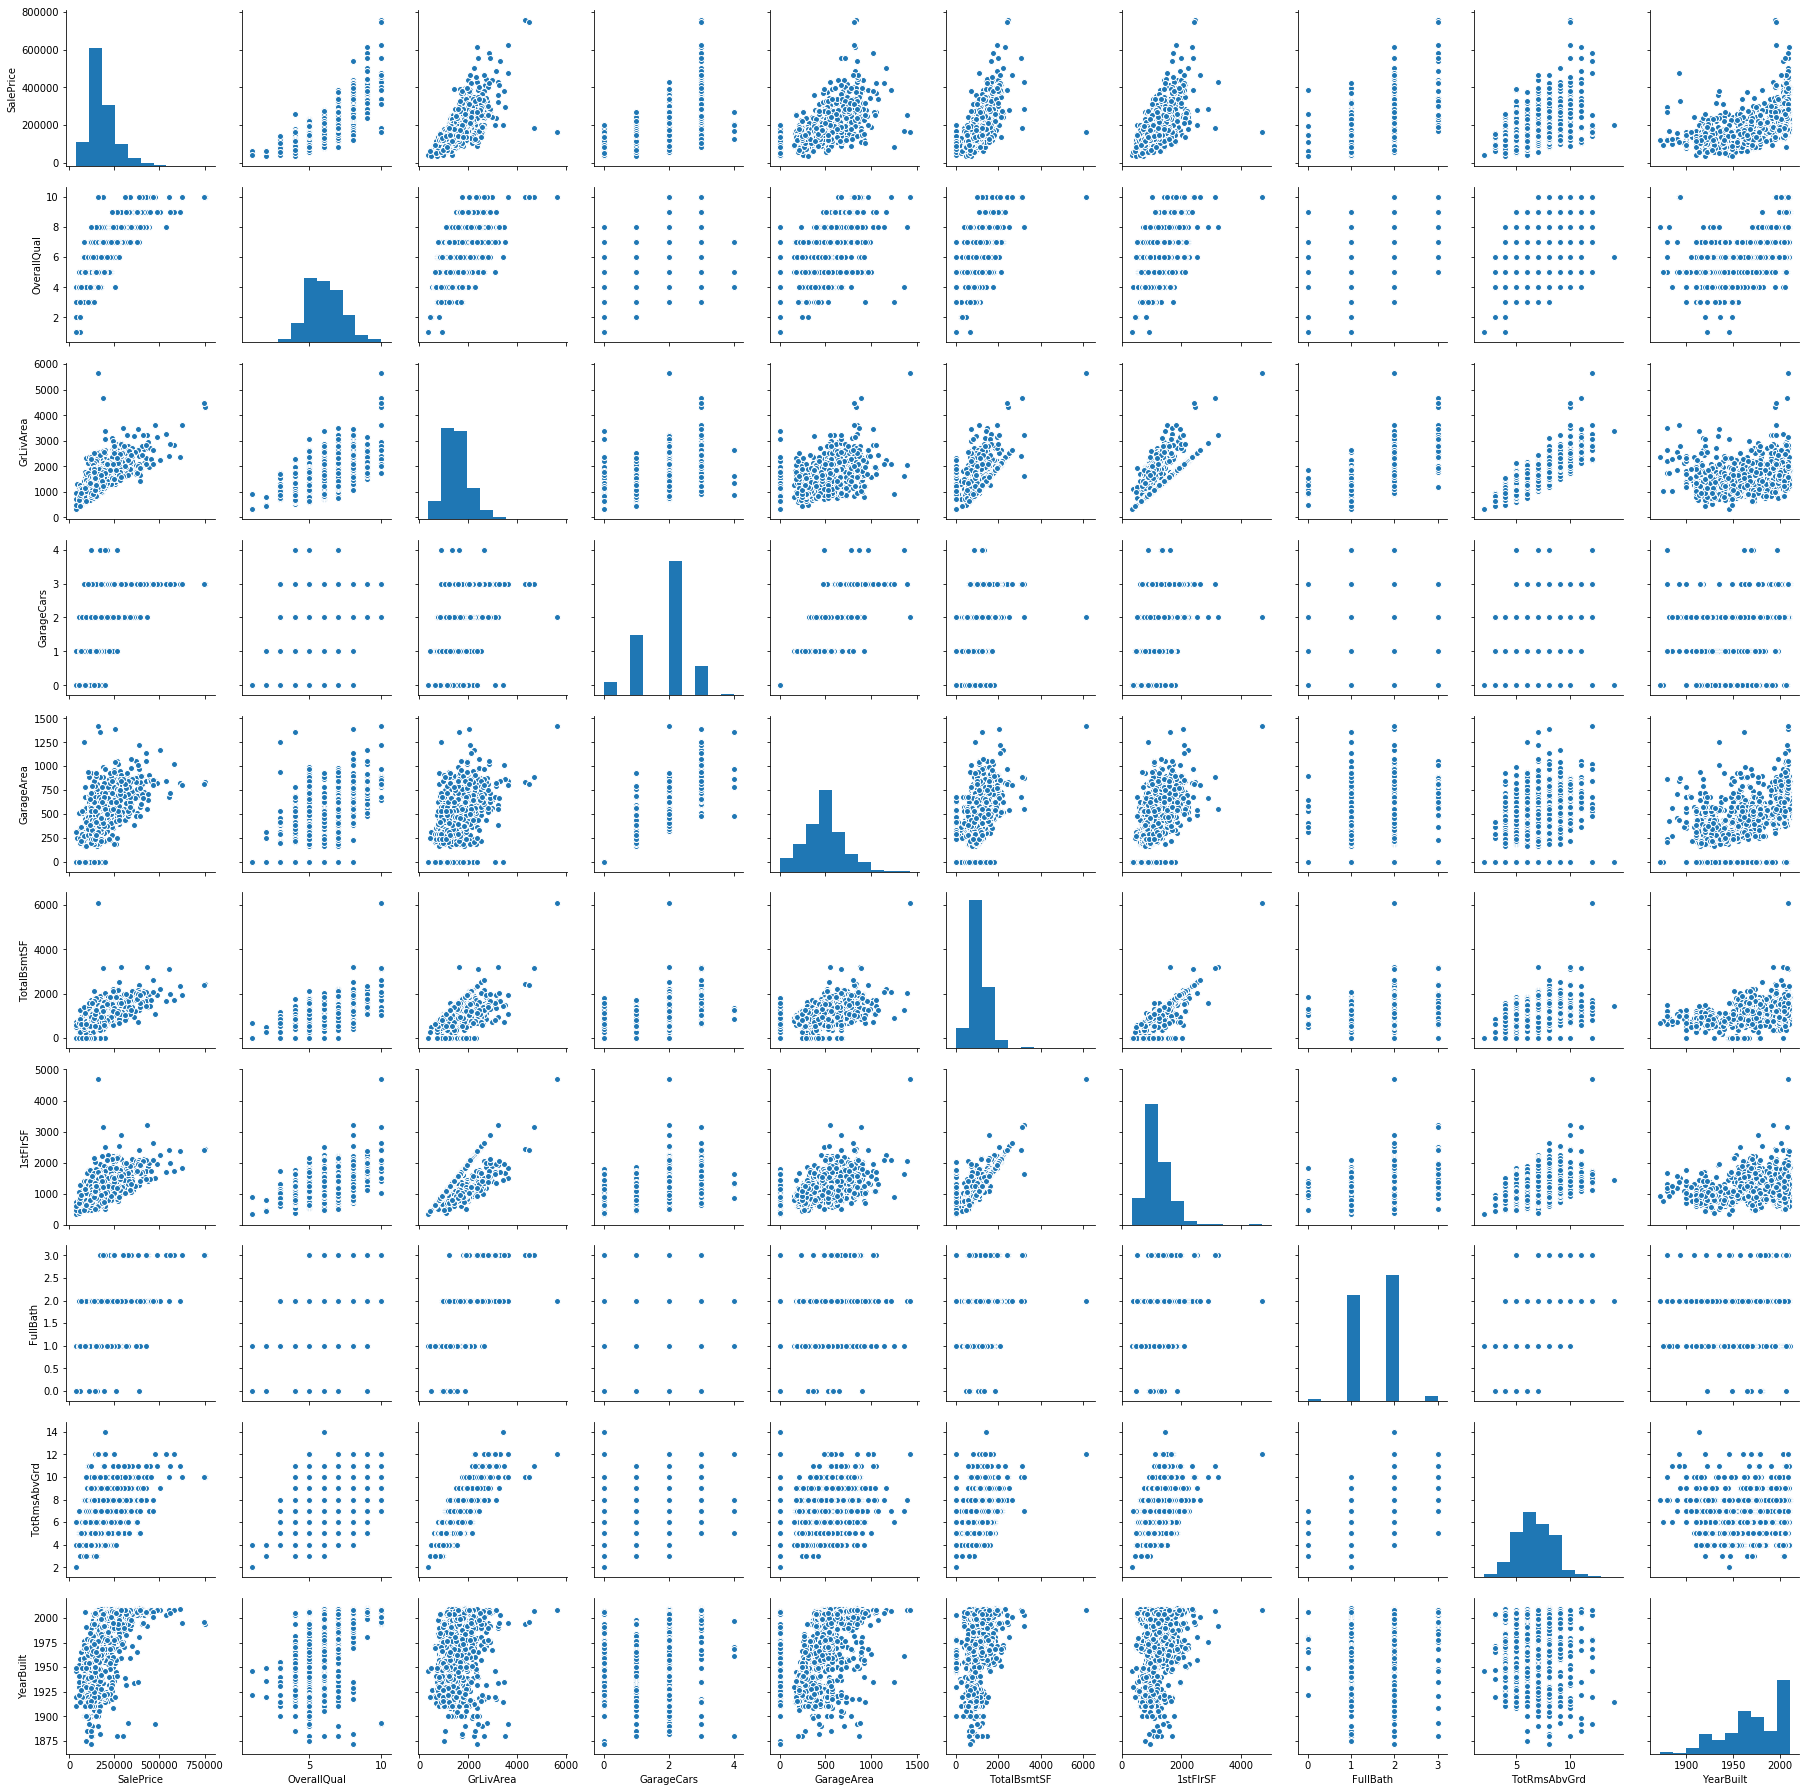

In [76]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[cr] )

In [77]:
#now lets see the missing values in the data

In [81]:
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [82]:
df.isnull().sum().sort_values(ascending = False)[:18]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [84]:
df.isnull().sum().sort_values(ascending = False)[:18].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [85]:
l = df.isnull().sum().sort_values(ascending = False)[:18].index

In [92]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'] ,1 , inplace = True)

In [93]:
df.shape

(1460, 63)

In [98]:
df[df["Electrical"].isnull()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [99]:
df[df["Electrical"].isnull()].index

Int64Index([1379], dtype='int64')

In [100]:
df.drop(df[df["Electrical"].isnull()].index , inplace = True)

In [101]:
df.shape

(1459, 63)

In [103]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
                ..
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [104]:
#now we come to outliers

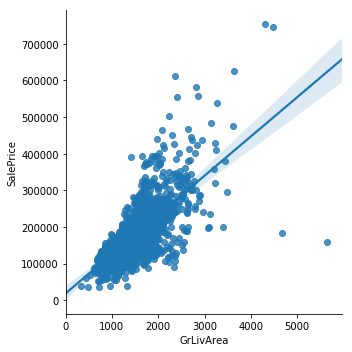

In [134]:
sns.lmplot(x = "GrLivArea" , y = "SalePrice" , data = df)

In [107]:
#these two are our outlirs which or not following trend
#let's check these two values

In [135]:
df["GrLivArea"].sort_values(ascending = False)[:3]

1298    5642
523     4676
1182    4476
Name: GrLivArea, dtype: int64

In [136]:
df[df["Id"]==1298]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [129]:
df[df["Id"]==1298].index


Int64Index([], dtype='int64')

In [125]:
df.drop(df[df["Id"]==1298].index , inplace = True)

In [126]:
df.drop(df[df["Id"] == 523].index , inplace = True)

In [127]:
df.shape

(1457, 63)

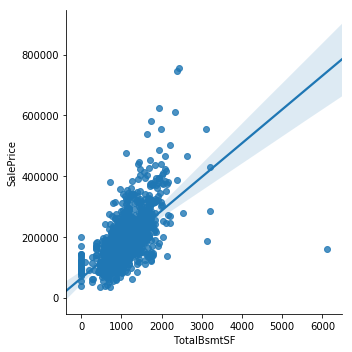

In [128]:
sns.lmplot(x = "TotalBsmtSF" , y = "SalePrice" , data = df)

In [119]:
#here also one value which is far away from population

In [123]:
df["TotalBsmtSF"].sort_values(ascending = False)[:3]

1298    6110
332     3206
496     3200
Name: TotalBsmtSF, dtype: int64

In [124]:
df[df["Id"]==1298]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


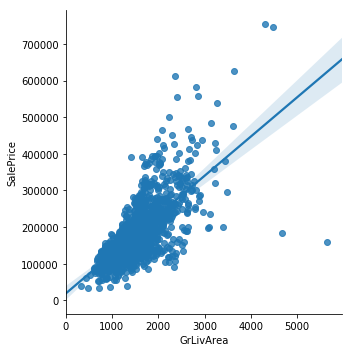

In [131]:
sns.lmplot(x = "GrLivArea" , y = "SalePrice" , data = df)

C:\Users\Nihal Verma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


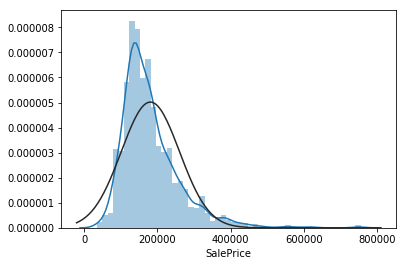

In [146]:
#Histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(df["SalePrice"] , fit = norm)
fig = plt.figure


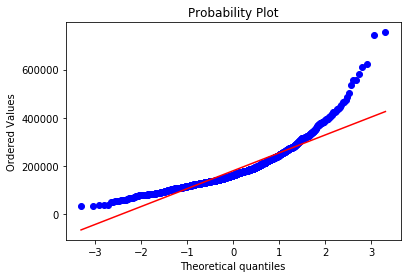

In [150]:
stats.probplot(df["SalePrice"] , plot = plt)
plt.show()

In [151]:
#"SalePrice" is not normal. it does not follow the diagonal line
# so we take log transformation

In [154]:
#first check that "SalePrice" is does not have 0 value
df["SalePrice"].describe()

count    1457.000000
mean       12.024200
std         0.399835
min        10.460242
25%        11.774520
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [155]:
#so min value is 10 so we can take log transformation

C:\Users\Nihal Verma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


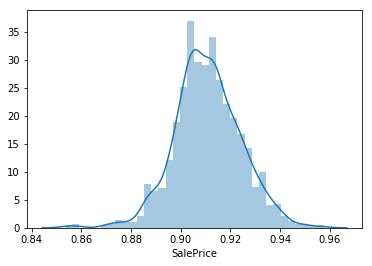

In [158]:
df["SalePrice"] = np.log(df["SalePrice"])
sns.distplot(df["SalePrice"])

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([2.3475816 , 2.34870024, 2.35543428, ..., 2.59117977, 2.60425435,
         2.60523999])),
 (0.03315133378282563, 2.486369111898739, 0.9955057471158437))

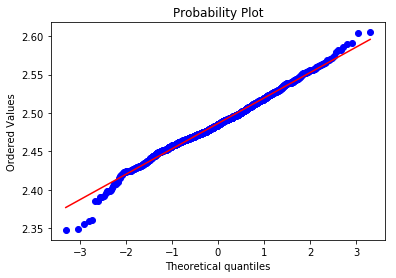

In [157]:
stats.probplot(df["SalePrice"] , plot = plt)

C:\Users\Nihal Verma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


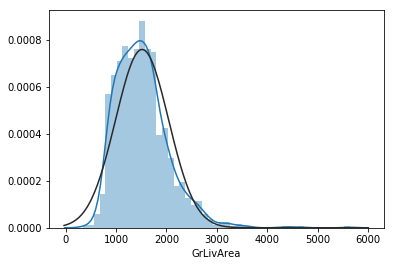

In [160]:
sns.distplot(df["GrLivArea"], fit = norm)

In [161]:
df["GrLivArea"].skew()

1.3651195371696039

In [ ]:
#it also have positive skewness

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 334,  438,  480, ..., 4476, 4676, 5642], dtype=int64)),
 (507.0827377451586, 1515.7494852436516, 0.9626814437963741))

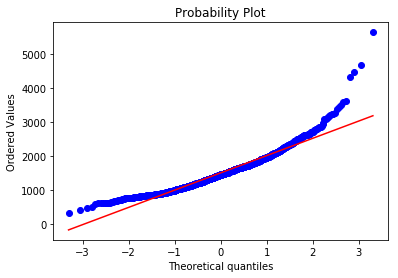

In [163]:
stats.probplot(df["GrLivArea"], plot = plt)

In [164]:
df["GrLivArea"]= np.log(df["GrLivArea"])

In [165]:
df["GrLivArea"].skew()

-0.0076473696788766305

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.40648507, 8.45019832,
         8.63799389])),
 (0.3335782553961726, 7.26789046402178, 0.997733040440625))

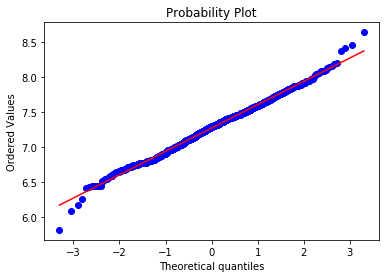

In [166]:
stats.probplot(df["GrLivArea"] , plot = plt)

C:\Users\Nihal Verma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


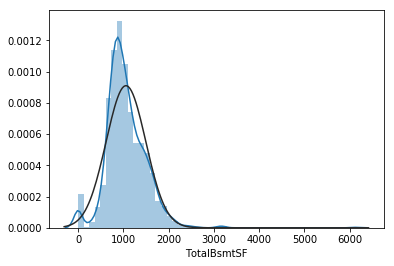

In [167]:
sns.distplot(df["TotalBsmtSF"], fit = norm)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 3200, 3206, 6110], dtype=int64)),
 (420.0937269547212, 1058.2786547700757, 0.9562325849468689))

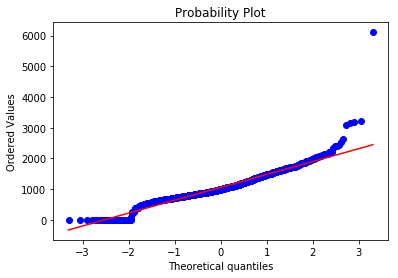

In [170]:
stats.probplot(df["TotalBsmtSF"] , plot = plt)

In [168]:
df["TotalBsmtSF"].describe()

count    1457.000000
mean     1058.278655
std       438.595281
min         0.000000
25%       796.000000
50%       992.000000
75%      1299.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [169]:
#it have 0 value so we can directly take log transformation

In [171]:
df.shape

(1457, 63)

In [172]:
df["hasbsmt"] = 0

In [173]:
df["hasbsmt"].shape

(1457,)

In [175]:
df.loc[df["TotalBsmtSF"]>0 , "hasbsmt"] = 1

In [178]:
df.loc[df["hasbsmt"]== 1, "TotalBsmtSF"] = np.log(df["TotalBsmtSF"])

C:\Users\Nihal Verma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


C:\Users\Nihal Verma\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


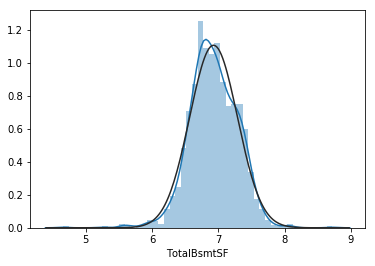

In [180]:
sns.distplot(df[df["TotalBsmtSF"] > 0]["TotalBsmtSF"] , fit = norm)

((array([-3.29734785, -3.03957662, -2.89619317, ...,  2.89619317,
          3.03957662,  3.29734785]),
  array([4.65396035, 5.24702407, 5.5759491 , ..., 8.07090609, 8.07277933,
         8.71768205])),
 (0.35756386181151806, 6.926163855922841, 0.9904030409503729))

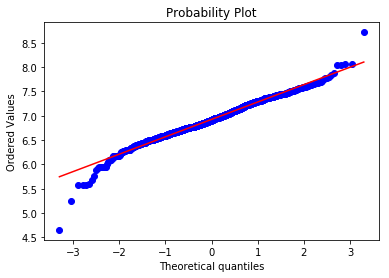

In [181]:
stats.probplot(df[df["TotalBsmtSF"]>0]["TotalBsmtSF"] , plot = plt)

In [182]:
df = pd.get_dummies(df)

In [183]:
df.shape

(1457, 223)

In [185]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR


In [187]:
cv = KFold(n_splits = 10 , random_state = 45 , shuffle = False)

In [201]:
svm = SVR(kernel = 'linear')

In [202]:
y =df["SalePrice"].values
X = df.drop(["SalePrice"] , axis = 1).values


In [206]:
score = []
for train , test in cv.split(X):
    print("train" , train)
    print("test", test)
    
    X_train, y_train, X_test , y_test = X[train] , y[train], X[test] , y[test]
    svm.fit(X_train, y_train)
    h = svm.score(X_test, y_test)
    score.append(h)

train [ 146  147  148 ... 1454 1455 1456]
test [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145]
train [   0    1    2 ... 1454 1455 1456]
test [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222

In [204]:
np.mean(score)

-0.16738780154703237

In [208]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
score1 = []
for train , test in cv.split(X):
    print("train" , train)
    print("test", test)
    
    X_train, y_train, X_test , y_test = X[train] , y[train], X[test] , y[test]
    lm.fit(X_train, y_train)
    h = lm.score(X_test, y_test)
    score1.append(h)

train [ 146  147  148 ... 1454 1455 1456]
test [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145]
train [   0    1    2 ... 1454 1455 1456]
test [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222

In [210]:
np.mean(score1)

0.8797762065235647

In [211]:
y_pred = lm.predict(X_test)

In [212]:
from sklearn.metrics import mean_squared_error as MSE

In [213]:
MSE(y_pred , y_test)

1.857930119819707e-05